In [2]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta

# 設置MySQL資料庫連接
db_user = 'root'
db_password = '19970730'
db_host = '127.0.0.1'
db_name = 'sql_stock'

# 創建資料庫連接引擎
engine = create_engine(f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}')

# 設置日期範圍
#today = datetime(2024, 5, 25)
today = datetime.now().date()
#one_year_ago = today - timedelta(days=365)
one_year_ago = today - timedelta(days=730) #兩年看看

# 格式化日期
today_str = today.strftime('%Y%m%d')
one_year_ago_str = one_year_ago.strftime('%Y%m%d')



# SQL 查詢 加權指數
query_twse = f"""
SELECT *
FROM daily_twse
WHERE date >= '{one_year_ago_str}' AND date <= '{today_str}'
"""

# SQL 查詢 個股
query_stock = f"""
SELECT *
FROM daily_price
WHERE date >= '{one_year_ago_str}' AND date <= '{today_str}'
"""

# SQL 查詢 細產業
query_sub_category = f"""
SELECT *
FROM sub_category
"""

# 使用 pd.read_sql 來執行查詢並讀取數據到 DataFrame
twse_df_raw = pd.read_sql(query_twse, engine)

stock_df_raw = pd.read_sql(query_stock, engine)

sub_category_list = pd.read_sql(query_sub_category, engine)



C:\Users\USER\AppData\Local\Temp\ipykernel_7028\2123822701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['震幅'] = 100*(stock['最高價']-stock['最低價'])/stock['開盤價']


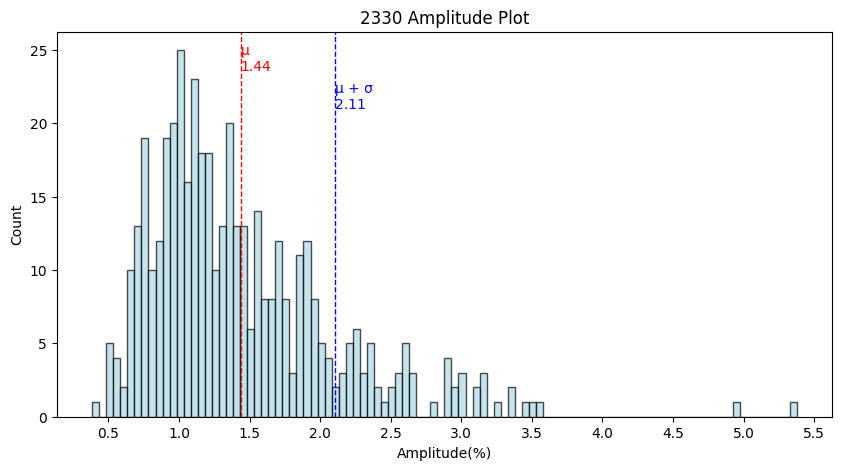

In [58]:

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator

stock_no = '2330'

stock = stock_df_raw[stock_df_raw['證券代號'] == stock_no]
stock['震幅'] = 100*(stock['最高價']-stock['最低價'])/stock['開盤價']
mean_amplitude = stock['震幅'].mean()
std_amplitude = stock['震幅'].std()

# 繪製震幅分佈圖
plt.figure(figsize=(10, 5))
plt.hist(stock['震幅'], bins=100, color='lightblue', edgecolor='black', alpha=0.7)

# 標註平均值
plt.axvline(mean_amplitude, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_amplitude, plt.ylim()[1]*0.9, f'μ\n{mean_amplitude:.2f}', color='red')

# 標註平均值+標準差
plt.axvline(mean_amplitude + std_amplitude, color='blue', linestyle='dashed', linewidth=1)
plt.text(mean_amplitude + std_amplitude, plt.ylim()[1]*0.8, f'μ + σ\n{mean_amplitude + std_amplitude:.2f}', color='blue')


# 添加標題和標籤
plt.title(stock_no + ' Amplitude Plot')
plt.xlabel('Amplitude(%)')
plt.ylabel('Count')

plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7028\2333747762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['漲跌幅'] = 100*(stock['開盤價'] - stock['收盤價'].shift(1))/stock['開盤價']


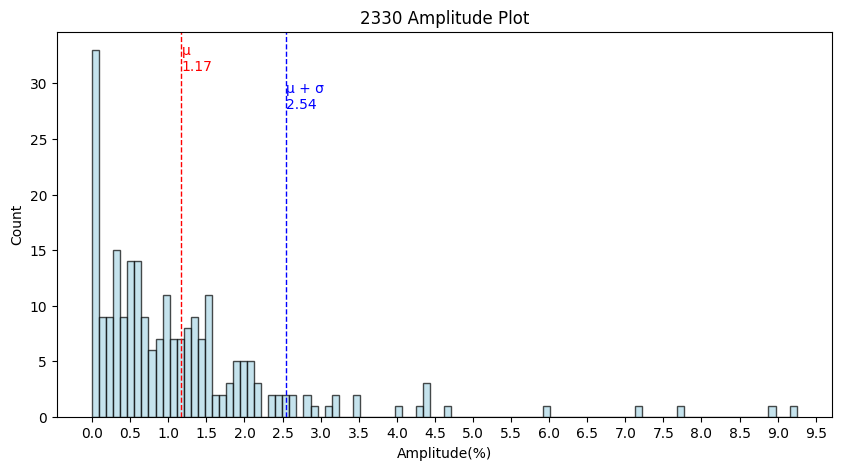

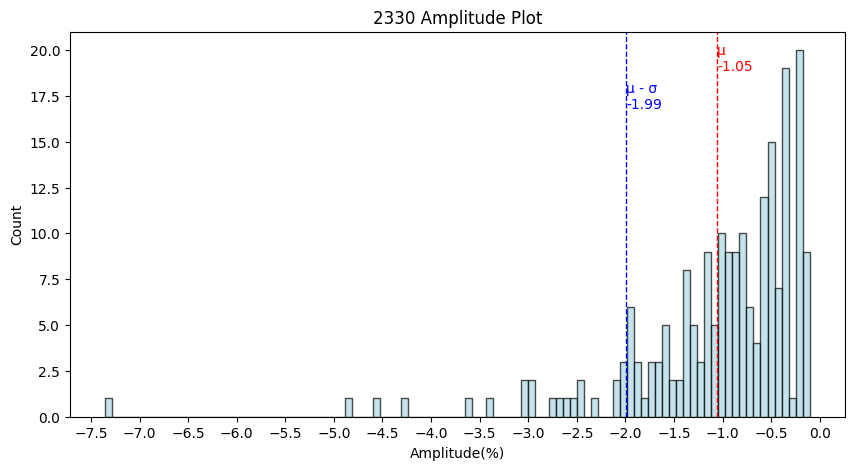

In [61]:
# 計算每日的開盤價減去昨天的收盤價
stock['漲跌幅'] = 100*(stock['開盤價'] - stock['收盤價'].shift(1))/stock['開盤價']
stock_nona = stock.dropna(subset=['漲跌幅'])
stock_nona_p = stock_nona[stock_nona['漲跌幅']>=0]
stock_nona_m = stock_nona[stock_nona['漲跌幅']<0]
mean_amplitude_p = stock_nona_p['漲跌幅'].mean()
std_amplitude_p = stock_nona_p['漲跌幅'].std()

# 繪製震幅分佈圖
plt.figure(figsize=(10, 5))
plt.hist(stock_nona_p['漲跌幅'], bins=100, color='lightblue', edgecolor='black', alpha=0.7)

# 標註平均值
plt.axvline(mean_amplitude_p, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_amplitude_p, plt.ylim()[1]*0.9, f'μ\n{mean_amplitude_p:.2f}', color='red')

# 標註平均值+標準差
plt.axvline(mean_amplitude_p + std_amplitude_p, color='blue', linestyle='dashed', linewidth=1)
plt.text(mean_amplitude_p + std_amplitude_p, plt.ylim()[1]*0.8, f'μ + σ\n{mean_amplitude_p + std_amplitude_p:.2f}', color='blue')


# 添加標題和標籤
plt.title(stock_no + ' Amplitude Plot')
plt.xlabel('Amplitude(%)')
plt.ylabel('Count')

plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
plt.show()


mean_amplitude_m = stock_nona_m['漲跌幅'].mean()
std_amplitude_m = stock_nona_m['漲跌幅'].std()

# 繪製震幅分佈圖
plt.figure(figsize=(10, 5))
plt.hist(stock_nona_m['漲跌幅'], bins=100, color='lightblue', edgecolor='black', alpha=0.7)

# 標註平均值
plt.axvline(mean_amplitude_m, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_amplitude_m, plt.ylim()[1]*0.9, f'μ\n{mean_amplitude_m:.2f}', color='red')

# 標註平均值+標準差
plt.axvline(mean_amplitude_m - std_amplitude_m, color='blue', linestyle='dashed', linewidth=1)
plt.text(mean_amplitude_m - std_amplitude_m, plt.ylim()[1]*0.8, f'μ - σ\n{mean_amplitude_m - std_amplitude_m:.2f}', color='blue')


# 添加標題和標籤
plt.title(stock_no + ' Amplitude Plot')
plt.xlabel('Amplitude(%)')
plt.ylabel('Count')

plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_24192\288380823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['震幅'] = 100*(stock['最高價']-stock['最低價'])/stock['開盤價']
C:\Users\USER\AppData\Local\Temp\ipykernel_24192\288380823.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['漲跌幅'] = 100 * (stock['開盤價'] - stock['收盤價'].shift(1)) / stock['開盤價']


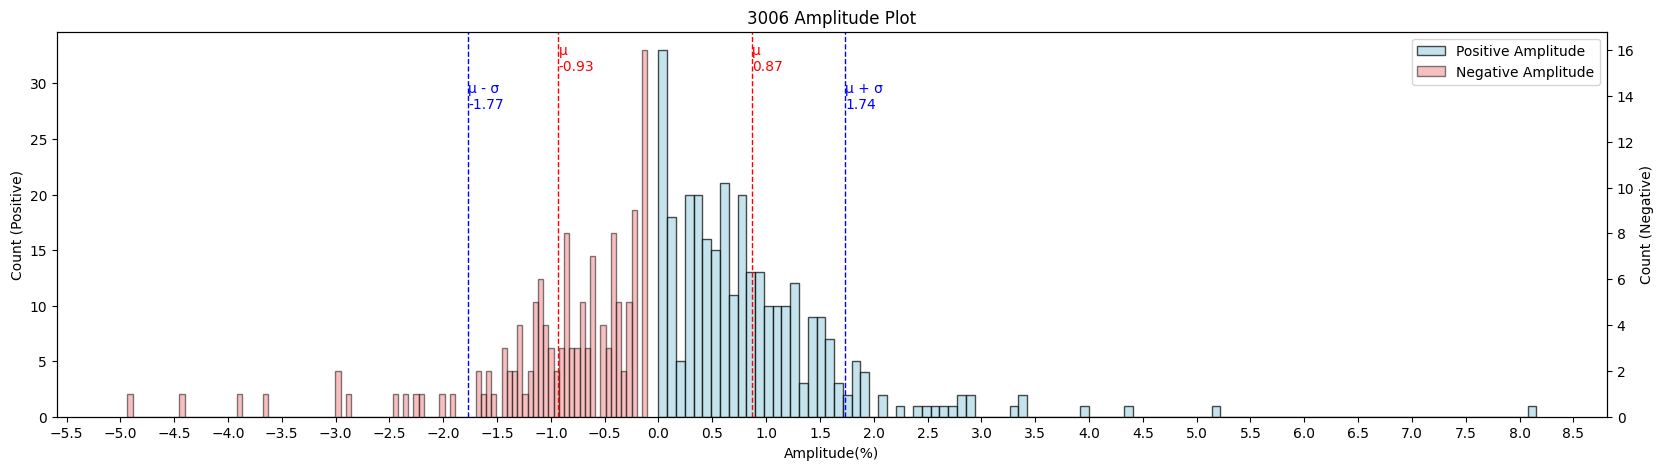

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

stock_no = '3006'

stock = stock_df_raw[stock_df_raw['證券代號'] == stock_no]

stock['震幅'] = 100*(stock['最高價']-stock['最低價'])/stock['開盤價']
mean_amplitude = stock['震幅'].mean()
std_amplitude = stock['震幅'].std()

# 假设 stock 是你的 DataFrame
stock['漲跌幅'] = 100 * (stock['開盤價'] - stock['收盤價'].shift(1)) / stock['開盤價']

# 去除含有 NA 值的行
stock_nona = stock.dropna(subset=['漲跌幅'])
stock_nona_p = stock_nona[stock_nona['漲跌幅'] >= 0]
stock_nona_m = stock_nona[stock_nona['漲跌幅'] < 0]

# 计算正涨跌幅的均值和标准差
mean_amplitude_p = stock_nona_p['漲跌幅'].mean()
std_amplitude_p = stock_nona_p['漲跌幅'].std()

# 计算负涨跌幅的均值和标准差
mean_amplitude_m = stock_nona_m['漲跌幅'].mean()
std_amplitude_m = stock_nona_m['漲跌幅'].std()

# 创建图表
fig, ax1 = plt.subplots(figsize=(20, 5))

# 绘制正涨跌幅分布图
ax1.hist(stock_nona_p['漲跌幅'], bins=100, color='lightblue', edgecolor='black', alpha=0.7, label='Positive Amplitude')
ax1.axvline(mean_amplitude_p, color='red', linestyle='dashed', linewidth=1)
ax1.text(mean_amplitude_p, ax1.get_ylim()[1]*0.9, f'μ\n{mean_amplitude_p:.2f}', color='red')
ax1.axvline(mean_amplitude_p + std_amplitude_p, color='blue', linestyle='dashed', linewidth=1)
ax1.text(mean_amplitude_p + std_amplitude_p, ax1.get_ylim()[1]*0.8, f'μ + σ\n{mean_amplitude_p + std_amplitude_p:.2f}', color='blue')

# 创建共享 y 轴的第二个坐标轴
ax2 = ax1.twinx()
ax2.hist(stock_nona_m['漲跌幅'], bins=100, color='lightcoral', edgecolor='black', alpha=0.5, label='Negative Amplitude')
ax2.axvline(mean_amplitude_m, color='red', linestyle='dashed', linewidth=1)
ax2.text(mean_amplitude_m, ax2.get_ylim()[1]*0.9, f'μ\n{mean_amplitude_m:.2f}', color='red')
ax2.axvline(mean_amplitude_m - std_amplitude_m, color='blue', linestyle='dashed', linewidth=1)
ax2.text(mean_amplitude_m - std_amplitude_m, ax2.get_ylim()[1]*0.8, f'μ - σ\n{mean_amplitude_m - std_amplitude_m:.2f}', color='blue')

# 添加标题和标签
plt.title(stock_no + ' Amplitude Plot')
ax1.set_xlabel('Amplitude(%)')
ax1.set_ylabel('Count (Positive)')
ax2.set_ylabel('Count (Negative)')

# 设置 x 轴刻度
ax1.xaxis.set_major_locator(plt.MultipleLocator(0.5))

# 显示图例
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# 显示图表
plt.show()


In [14]:

''' A chart that uses the population dataset of the globe.
This example shows the ability of Bokeh to use two different kinds of graph into
one file and sorting them by having different colors and lines.

'''
from math import pi

from bokeh.io import curdoc
from bokeh.layouts import column, row
from bokeh.models import (ColumnDataSource, CustomJSTickFormatter,
                          CustomJSTransform, Select)
from bokeh.plotting import figure
from bokeh.transform import factor_cmap, transform

from bokeh.plotting import figure, output_file, show
import pandas as pd
import numpy as np
from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Select, Div, Span, Label
from bokeh.plotting import figure



# 创建图表
p = figure(height=350, width=800, title="Stock Amplitude", x_axis_label="Amplitude (%)", y_axis_label="Count")
#p.quad(top='top', bottom=0, left='left', right='right', source=source, fill_color='lightblue', line_color='black', alpha=0.7)

# 创建下拉菜单

select = Select(title="Select Stock No:", value="2330", options=sorted(stock_df_raw.證券名稱.unique()))

# 更新函数
def update():
    stock_no = select.value
    stock = stock_df_raw[stock_df_raw['證券代號'] == stock_no]
    stock['震幅'] = 100 * (stock['最高價'] - stock['最低價']) / stock['開盤價']
    
    mean_amplitude = stock['震幅'].mean()
    std_amplitude = stock['震幅'].std()
    
    hist, edges = np.histogram(stock['震幅'], bins=100)
    

    # 更新图表标题
    p.title.text = f"{stock_no} Amplitude Plot"
    
    # 绘制均值和标准差
    p.renderers = p.renderers[:1]  # 保留直方图，删除其他
    mean_span = Span(location=mean_amplitude, dimension='height', line_color='red', line_dash='dashed', line_width=1)
    std_span = Span(location=mean_amplitude + std_amplitude, dimension='height', line_color='blue', line_dash='dashed', line_width=1)
    
    p.add_layout(mean_span)
    p.add_layout(Label(x=mean_amplitude, y=max(hist) * 0.9, text=f'μ\n{mean_amplitude:.2f}', text_color='red', text_align='center'))
    p.add_layout(std_span)
    p.add_layout(Label(x=mean_amplitude + std_amplitude, y=max(hist) * 0.8, text=f'μ + σ\n{mean_amplitude + std_amplitude:.2f}', text_color='blue', text_align='center'))

select.on_change('value',  lambda attr, old, new: update())

# 初始更新
update()

# 创建布局
#layout = column(Div(text="<h1>Interactive Stock Amplitude Plot</h1>"), select, p)

# 添加到当前文档
controls = column(select, width=300)
curdoc().title = "Stock Amplitude Plot"

show(p) 

C:\Users\USER\AppData\Local\Temp\ipykernel_24192\3059362737.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['震幅'] = 100 * (stock['最高價'] - stock['最低價']) / stock['開盤價']


In [85]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]
data = dict(fruits=fruits, counts = counts , color = Spectral6)

source = ColumnDataSource(data=data)

sorted_fruits = sorted(fruits, key= lambda x: counts[fruits.index(x)])

p = figure(x_range=sorted_fruits, y_range = (0,11) , height=350, title="Fruit Counts",
           toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")


p.vbar(x='fruits', top='counts', width=0.9 , color = 'color' , legend_field = "fruits", source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0



show(p)

In [69]:
stock_list = ['2330','2317']
stock_list

['2330', '2317']

In [4]:
import collections
df_rs70_category_week = pd.DataFrame()  #多筆每日強勢細產業

sub_category_list.rename(columns={'stock_id': '證券代號'}, inplace=True)

stock_df_raw['Date'] = pd.to_datetime(stock_df_raw['Date'])
data_date_list = collections.Counter(stock_df_raw['Date'].sort_values(ascending=False))

for day in data_date_list:
        day = day.strftime('%Y-%m-%d')
        # 取每天RS大於90的產業出來
        stock_df_today = stock_df_raw[stock_df_raw['Date']==day].copy()  
        stock_df_today.sort_values(by=['60RS_rank'], inplace=True)

        stock_df_today90 = stock_df_today[stock_df_today['60RS_rank']>90]

        merged_rs_sub = pd.merge(stock_df_today90, sub_category_list, on='證券代號', how='inner')  #RS超過90的
        merged_sub = pd.merge(stock_df_today, sub_category_list, on='證券代號', how='inner')  # 全部股票

        cols = ['Date', '證券代號', 'stock_name','60RS_rank','main_category','sub_category']
        merged_rs_sub = merged_rs_sub[cols]
        merged_sub = merged_sub[cols]

        #找細產業別 跟 母體
        df_rs70_sub_category = collections.Counter(merged_rs_sub['sub_category'])
        df_all_sub_category = collections.Counter(merged_sub['sub_category'])

        df_sub_category = pd.DataFrame()
        for i in df_rs70_sub_category:
                sub_category = {
                "date": [day],
                "sub_category": [i],
                "main_rank": [df_rs70_sub_category[i]],
                "all": [df_all_sub_category[i]],
                "pen": [round((df_rs70_sub_category[i]/df_all_sub_category[i])*100,2)]}

                df_sub_category_temp = pd.DataFrame(sub_category)
                df_sub_category = pd.concat([df_sub_category,df_sub_category_temp])
                df_sub_category.sort_values(by=['pen'], ascending=False, inplace=True)

        df_rs70_category_week = pd.concat([df_rs70_category_week,df_sub_category])

                


In [5]:
compare_df = pd.DataFrame()
countdown = 60  #看輪動天數
pen = 40

for day in data_date_list:
        day_change = day.strftime('%Y-%m-%d')
        countdown -= 1 
        df_rs = pd.DataFrame()
        if(countdown>0):   
                getIndex = list(data_date_list).index(day) # 取index 找下一天
                day_before = list(data_date_list)[getIndex+1].strftime('%Y-%m-%d')
                df_rs70_category_1 = df_rs70_category_week[(df_rs70_category_week['date'] == day_change) &(df_rs70_category_week['main_rank'] > 2) & (df_rs70_category_week['pen'] > pen)]
                df_rs70_category_2 = df_rs70_category_week[(df_rs70_category_week['date'] == day_before) &(df_rs70_category_week['main_rank'] > 2) & (df_rs70_category_week['pen'] > pen)]

                sub_category_list_now = list(df_rs70_category_1['sub_category'])
                sub_category_before = list(df_rs70_category_2['sub_category'])
                compare_add = [x for x in sub_category_list_now if x not in sub_category_before] #新進入名單
                compare_remove = [x for x in sub_category_before if x not in sub_category_list_now] #新進入名單
                compare_list = {
                "Date": [day_change],
                "add": [compare_add],
                "remove": [compare_remove],
                "add_count": [len(compare_add)],
                "remove_count": [len(compare_remove)],
                "diff_count": [len(compare_add) - len(compare_remove)]}

                compare_list_temp = pd.DataFrame(compare_list)
                compare_df = pd.concat([compare_df,compare_list_temp])

In [6]:
compare_df30 = compare_df.iloc[:60]
compare_df30['Date'] = pd.to_datetime(compare_df30['Date'])
twse_index = twse_df_raw[twse_df_raw['指數名稱'] == '發行量加權股價指數'].copy()
twse_index['Date'] = pd.to_datetime(twse_index['Date'])
merged_hist = pd.merge(compare_df30, twse_index, on='Date', how='inner')  # 全部股票

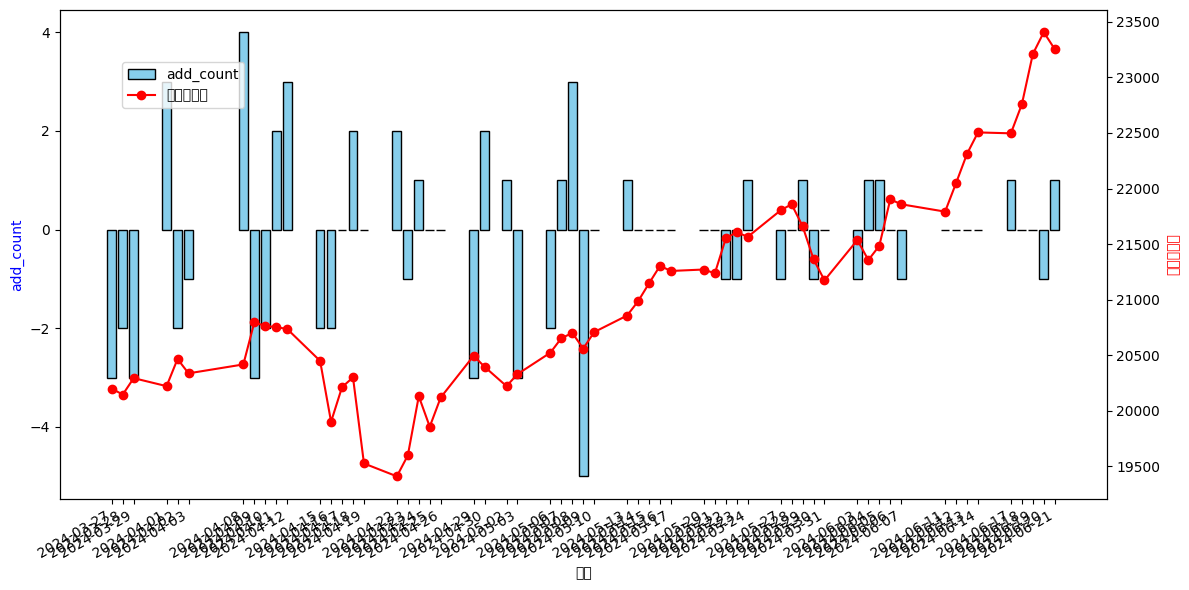

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# 禁用特定类型的警告
#warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')
warnings.filterwarnings("ignore", category=UserWarning)

# 假设 compare_df30 和 merged_hist 的数据如下
compare_df30_data = {
    'date': merged_hist['Date'],
    'diff_count': merged_hist['diff_count']
}

merged_hist_data = {
    'date': merged_hist['Date'],
    '價格指數值': merged_hist['價格指數值']
}

compare_df30_df = pd.DataFrame(compare_df30_data)
merged_hist_df = pd.DataFrame(merged_hist_data)

# 确保日期列为 datetime 类型
compare_df30_df['date'] = pd.to_datetime(compare_df30_df['date'])
merged_hist_df['date'] = pd.to_datetime(merged_hist_df['date'])

# 创建图表
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 compare_df30 的条形图
ax1.bar(compare_df30_df['date'], compare_df30_df['diff_count'], color='skyblue', edgecolor='black', label='add_count')

# 设置第一个 y 轴的标签
ax1.set_ylabel('add_count', color='blue')
ax1.set_xlabel('日期')



# 設置x軸刻度為實際存在的日期
ax1.set_xticks(compare_df30_df['date'])

# 格式化 x 轴为日期格式
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(plt.matplotlib.dates.DayLocator())

# 自动旋转日期标签以避免重叠
fig.autofmt_xdate()

# 创建第二个 y 轴
ax2 = ax1.twinx()

# 绘制 merged_hist 的折线图
ax2.plot(merged_hist_df['date'], merged_hist_df['價格指數值'], color='red', marker='o', linestyle='-', label='價格指數值')
ax2.set_xticks(merged_hist_df['date'])

# 设置第二个 y 轴的标签
ax2.set_ylabel('價格指數值', color='red')

# 添加图例
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# 自动调整布局以适应标签
fig.tight_layout()

# 显示图表
plt.show()


In [8]:
#compare_df
# 看個別細產業
temp = sub_category_list[sub_category_list['sub_category'] == '記憶體']
stock_df_raw['Date'] = pd.to_datetime(stock_df_raw['Date'])
temp2 = stock_df_raw[stock_df_raw['Date']=='2024-06-13']
temp3 = pd.merge(temp, temp2, on='證券代號', how='inner')  # 全部股票

cols = ['證券代號', 'stock_name', 'sub_category','20RS_rank','Date']
temp3 = temp3[cols]
temp3.sort_values(by=['20RS_rank'], inplace=True)
temp3



,證券代號,stock_name,sub_category,20RS_rank,Date
12,6276,安鈦克,記憶體,21.842818,2024-06-13
14,8084,巨虹,記憶體,24.390244,2024-06-13
16,8088,品安,記憶體,35.663957,2024-06-13
15,8088,品安,記憶體,35.663957,2024-06-13
0,2344,華邦電,記憶體,37.018970,2024-06-13
1,2344,華邦電,記憶體,37.018970,2024-06-13
13,6470,宇智,記憶體,44.878049,2024-06-13
11,5386,青雲,記憶體,46.883469,2024-06-13
18,8271,宇瞻,記憶體,70.460705,2024-06-13
5,3260,威剛,記憶體,72.845528,2024-06-13


In [10]:
tt = stock_df_raw[stock_df_raw['證券名稱'] == '信驊']
#tt.tail(50)

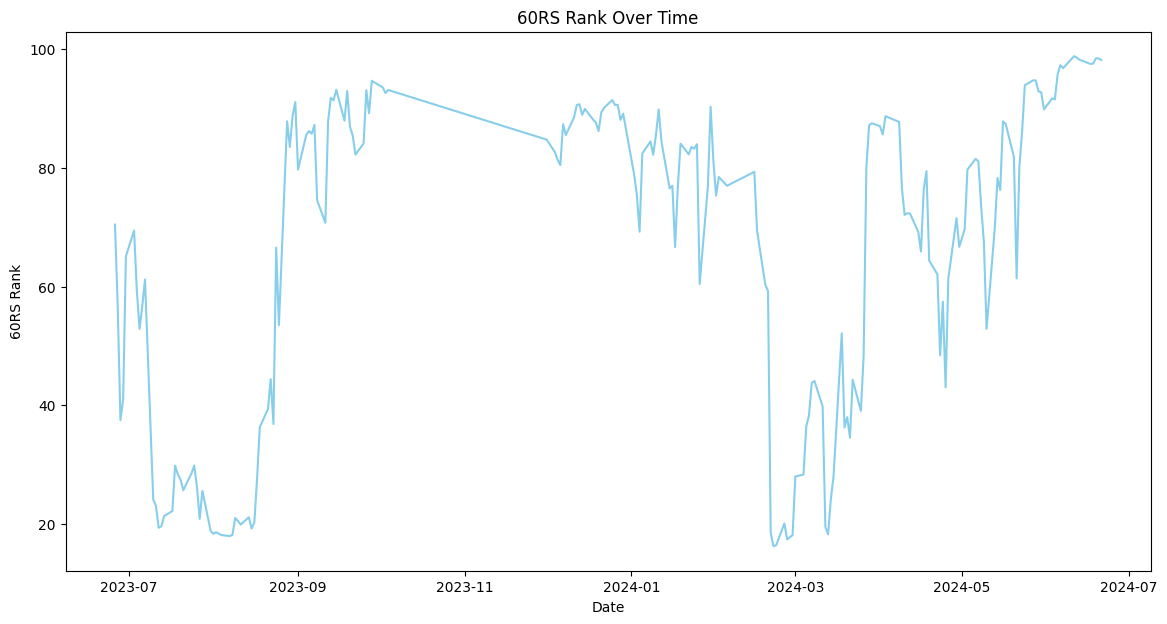

In [8]:
tt = stock_df_raw[stock_df_raw['證券名稱'] == '信驊']
import pandas as pd
import matplotlib.pyplot as plt


# 示例数据
data = {
    'date': tt['Date'],
    '60RS_rank': tt['60RS_rank']
}
tt_df = pd.DataFrame(data)

# 确保日期列是日期类型
tt_df['date'] = pd.to_datetime(tt_df['date'])

# 创建图表
plt.figure(figsize=(14, 7))
plt.plot(tt_df['date'], tt_df['60RS_rank'], color='skyblue')

# 设置标题和标签
plt.title('60RS Rank Over Time')
plt.xlabel('Date')
plt.ylabel('60RS Rank')

# 显示图表
plt.show()

# 可能需要60RS_RANK